## Importing Libraries

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

## Importing and Preprocessing the Data

In [2]:
#reading in the data
data = pd.read_csv("credit risk.csv")

In [3]:
#viewing the top 10 part of the data
data.head(10)

,Applicant_ID,Credit_Score,Late_Payments,Months_In_Job,Debt_Income_Ratio,Loan_Amt,Liquid_Assets,Num_Credit_Lines,Credit_Risk
0,744488,607,5,29,3.414,103519,2696,6,Moderate
1,350833,533,8,21,3.737,74868,5336,8,Moderate
2,466037,474,12,25,5.061,93468,1785,4,High
3,721737,551,13,3,5.926,41708,2104,10,High
4,455703,768,0,13,1.910,318995,11523,3,Low
5,347843,426,8,13,4.727,58569,3255,6,High
6,868476,723,1,33,1.600,192875,14488,3,Low
7,744628,593,5,22,4.150,154386,4586,4,Moderate
8,813097,444,12,4,11.475,208354,2946,9,DO NOT LEND
9,792339,489,9,9,5.300,125987,3911,4,High


In [4]:
#checking for missing values
data.isnull().sum()

Applicant_ID         0
Credit_Score         0
Late_Payments        0
Months_In_Job        0
Debt_Income_Ratio    0
Loan_Amt             0
Liquid_Assets        0
Num_Credit_Lines     0
Credit_Risk          0
dtype: int64

In [5]:
#getting more information on the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Applicant_ID       676 non-null    int64  
 1   Credit_Score       676 non-null    int64  
 2   Late_Payments      676 non-null    int64  
 3   Months_In_Job      676 non-null    int64  
 4   Debt_Income_Ratio  676 non-null    float64
 5   Loan_Amt           676 non-null    int64  
 6   Liquid_Assets      676 non-null    int64  
 7   Num_Credit_Lines   676 non-null    int64  
 8   Credit_Risk        676 non-null    object 
dtypes: float64(1), int64(7), object(1)
memory usage: 47.7+ KB


In [6]:
#getting statistical summary of the dataset
data.describe()

,Applicant_ID,Credit_Score,Late_Payments,Months_In_Job,Debt_Income_Ratio,Loan_Amt,Liquid_Assets,Num_Credit_Lines
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,548953.392012,613.591716,5.023669,27.445266,3.794420,189545.633136,7464.181953,5.186391
std,245697.572749,117.779891,4.564537,18.935249,2.514157,88783.745728,5670.381218,2.525284
min,139993.000000,397.000000,0.000000,2.000000,0.050000,39236.000000,830.000000,1.000000
25%,327483.500000,517.000000,1.000000,14.000000,1.917500,115715.250000,2980.000000,3.000000
50%,529909.000000,595.500000,4.000000,23.000000,3.025000,186210.500000,5227.500000,5.000000
75%,760908.500000,723.000000,8.000000,38.000000,4.850000,257236.250000,10871.000000,7.000000
max,980774.000000,826.000000,23.000000,102.000000,12.523000,449485.000000,24699.000000,12.000000


In [7]:
#checking for duplicates
data.duplicated().value_counts()

False    676
dtype: int64

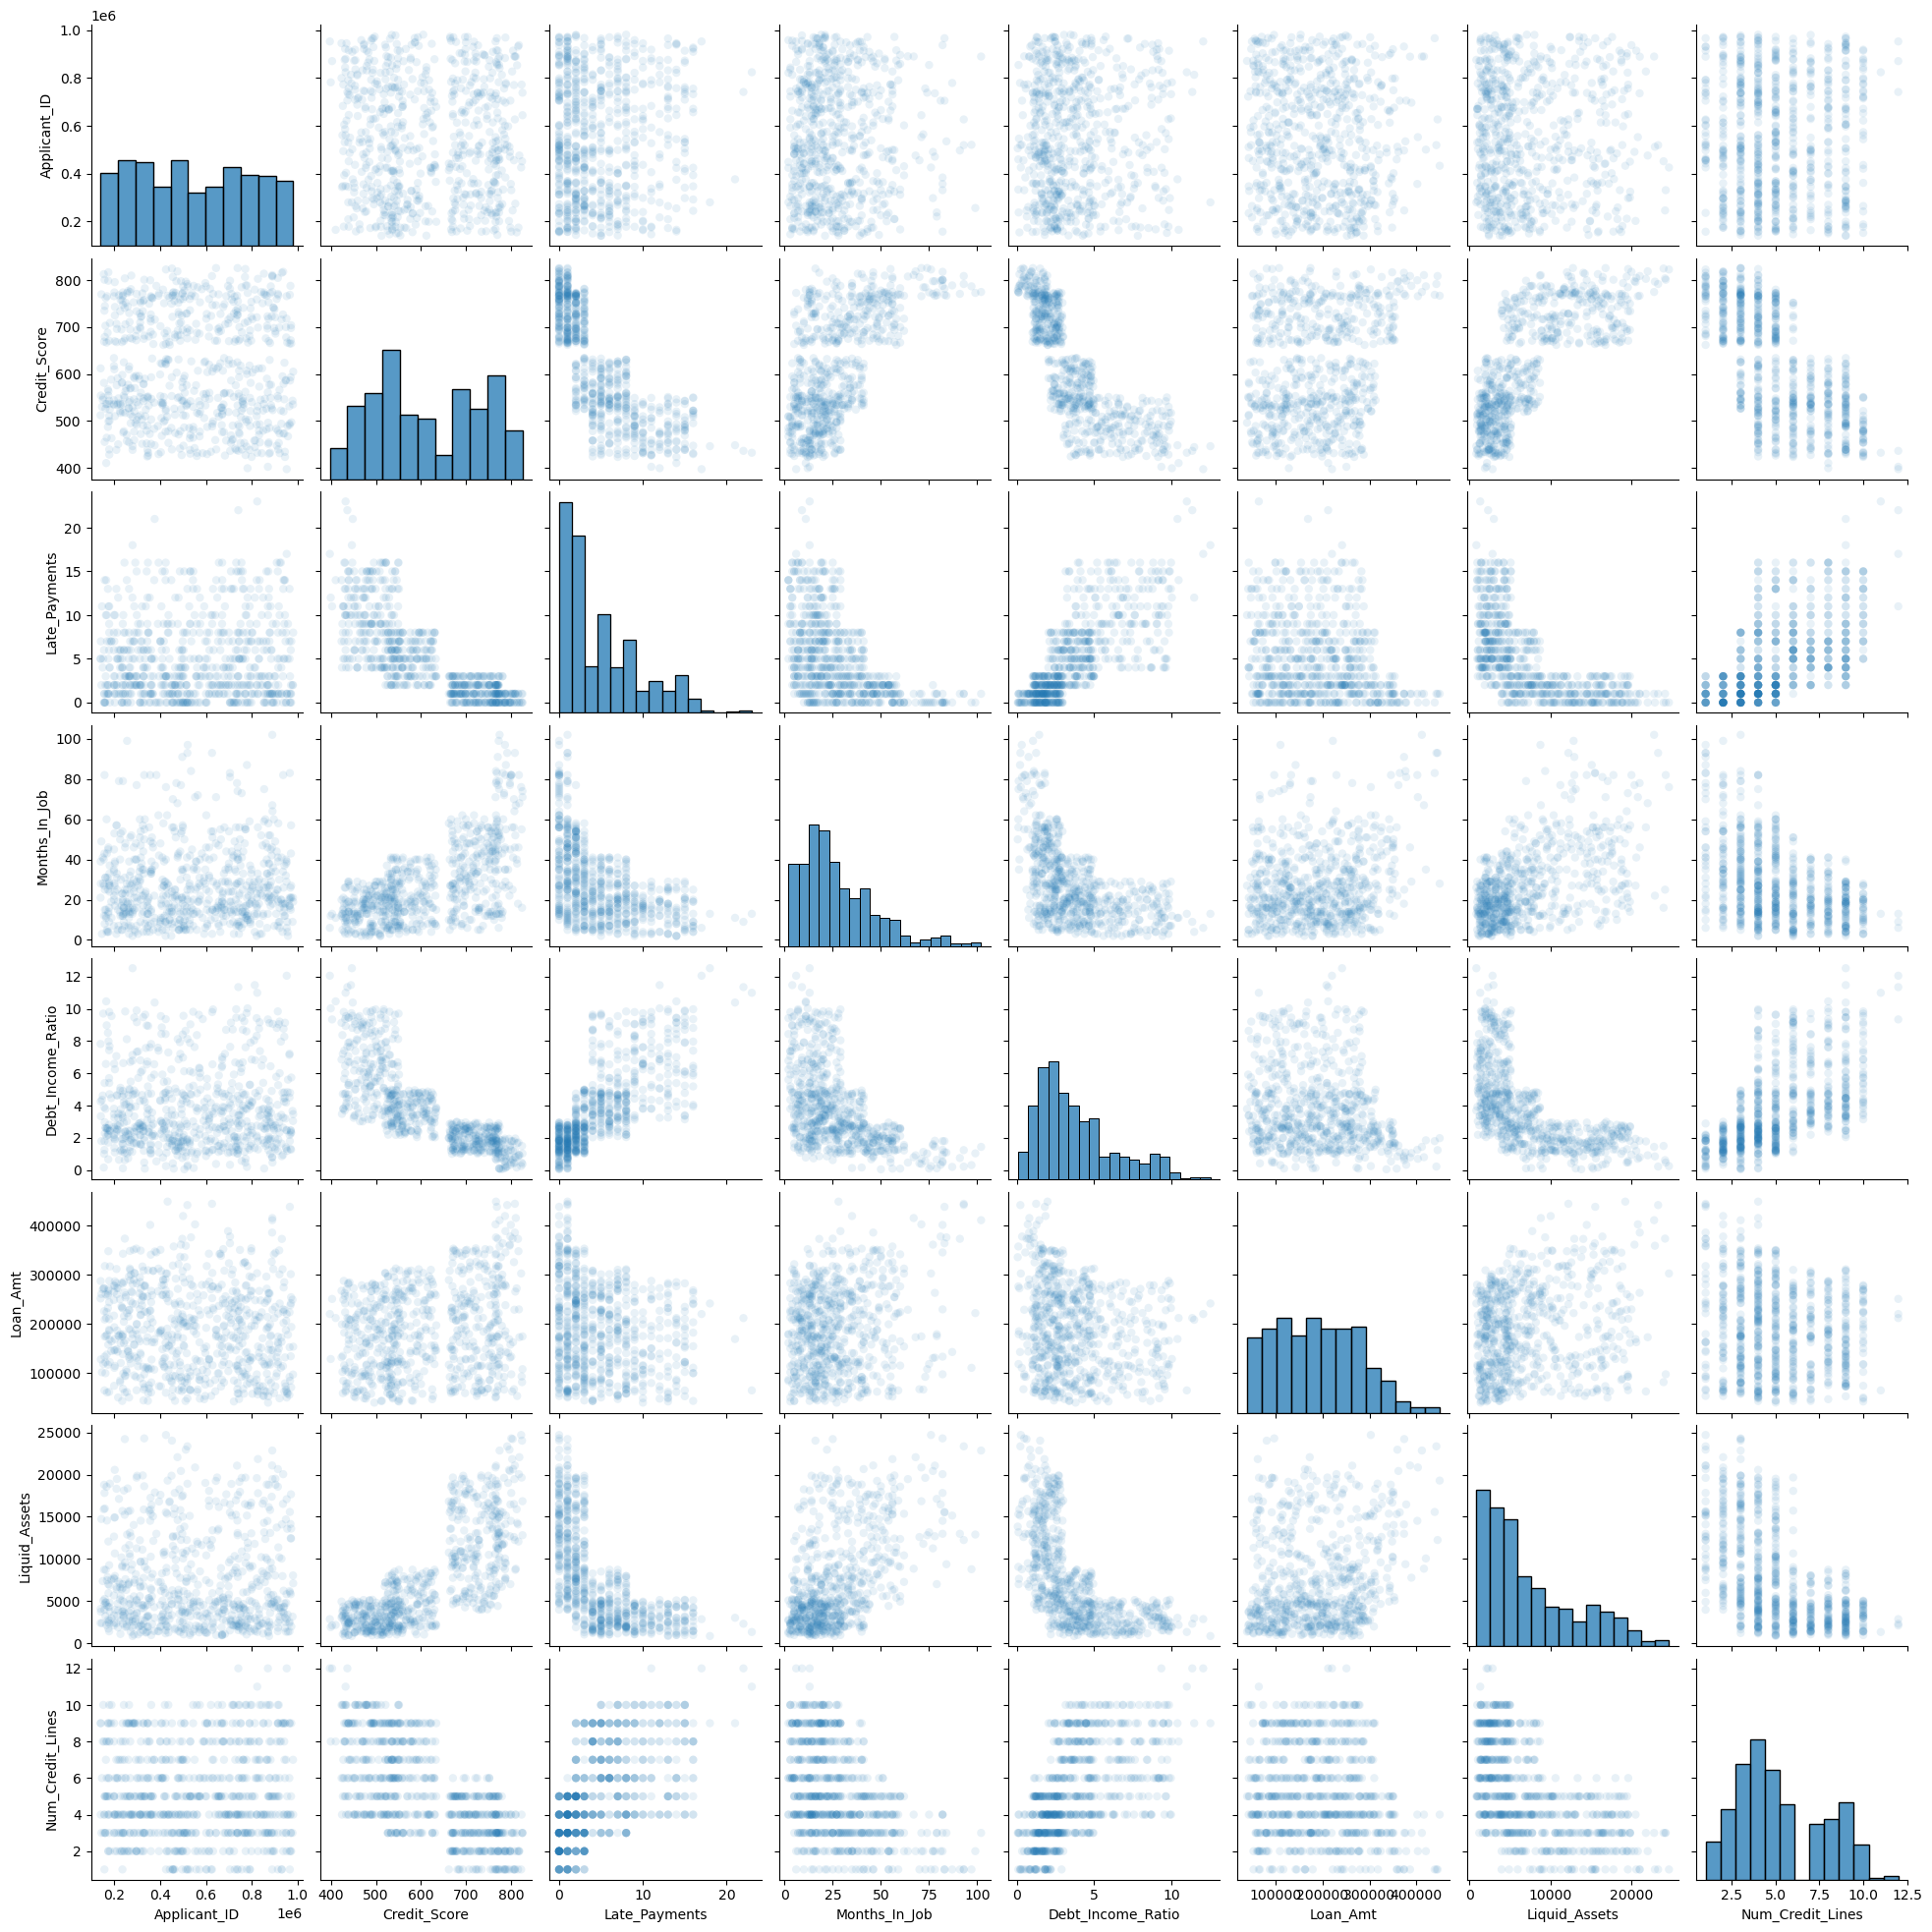

In [8]:
#creating matrix scatterplot to check for outliers
sns.pairplot(data, plot_kws = dict(alpha = .1, edgecolor = 'none'))

## Exploratory Data Analysis

**Visualizing with Boxplots**

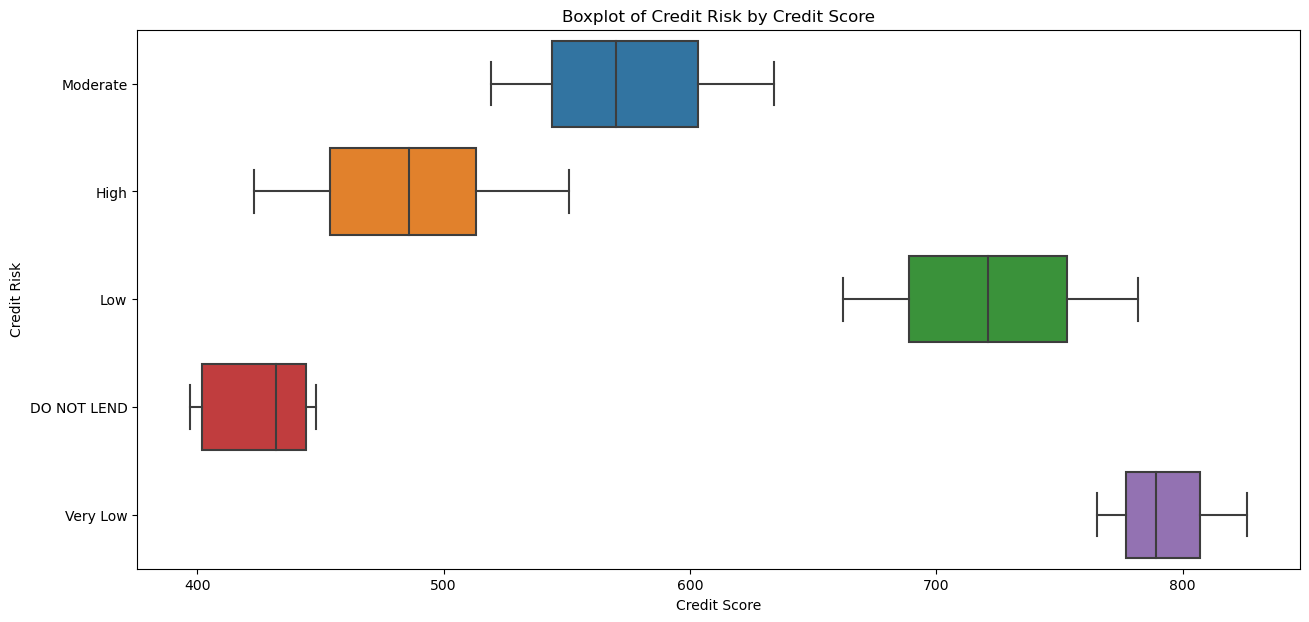

In [9]:
f, ax = plt.subplots(figsize=(15,7))
ax = sns.boxplot(x =data['Credit_Score'], y =data['Credit_Risk'])

# Set labels and title
ax.set_xlabel('Credit Score')
ax.set_ylabel('Credit Risk')
ax.set_title('Boxplot of Credit Risk by Credit Score')

# Show the plot
plt.show()


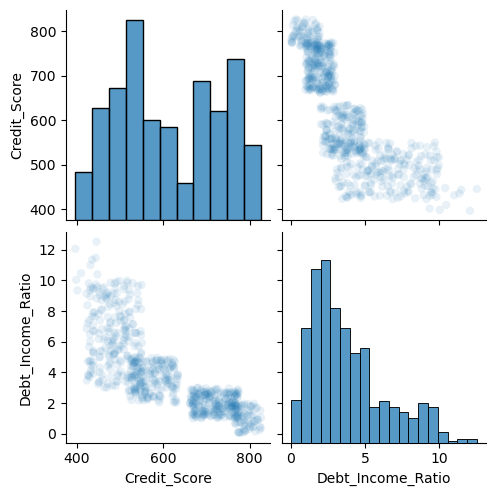

In [10]:
# Creating a scatterplot matrix to visualize the Credit_Risk and Months_In_Job
sns.pairplot(data, vars=['Credit_Score', 'Debt_Income_Ratio'], plot_kws=dict(alpha=0.1, edgecolor='none'))

# Display the plot
plt.show()


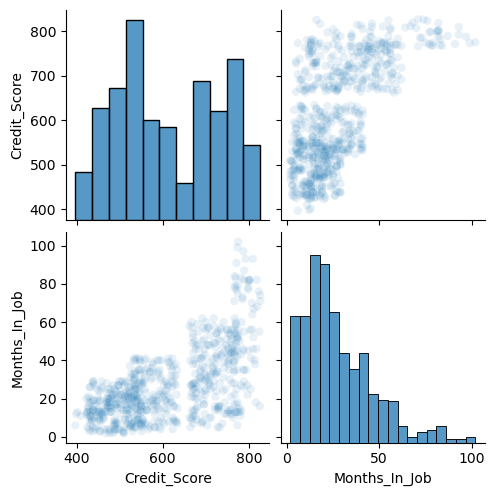

In [11]:
# Creating a scatterplot matrix to visualize the Credit_Risk and Months_In_Job
sns.pairplot(data, vars=['Credit_Score', 'Months_In_Job'], plot_kws=dict(alpha=0.1, edgecolor='none'))

# Display the plot
plt.show()


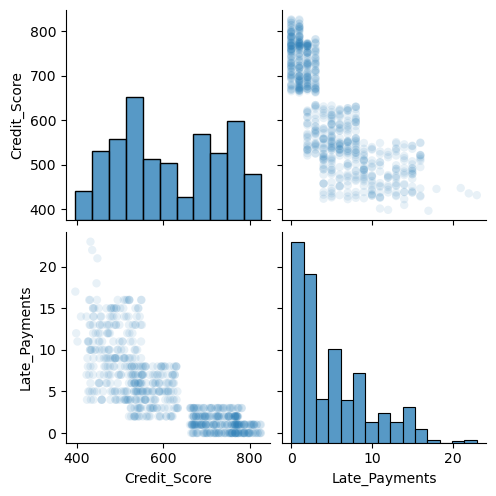

In [12]:
# Creating a scatterplot matrix to visualize the Credit_Risk and Months_In_Job
sns.pairplot(data, vars=['Credit_Score', 'Late_Payments'], plot_kws=dict(alpha=0.1, edgecolor='none'))

# Display the plot
plt.show()


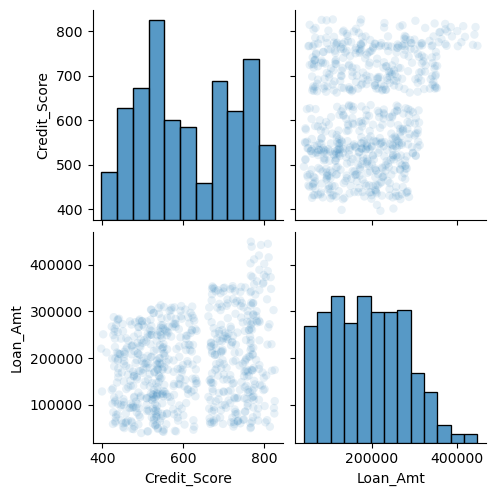

In [13]:
# Creating a scatterplot matrix to visualize the Credit_Risk and Months_In_Job
sns.pairplot(data, vars=['Credit_Score', 'Loan_Amt'], plot_kws=dict(alpha=0.1, edgecolor='none'))

# Display the plot
plt.show()


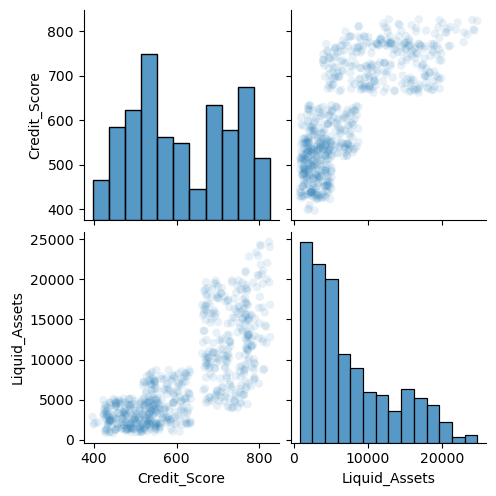

In [14]:
# Creating a scatterplot matrix to visualize the Credit_Risk and Months_In_Job
sns.pairplot(data, vars=['Credit_Score', 'Liquid_Assets'], plot_kws=dict(alpha=0.1, edgecolor='none'))

# Display the plot
plt.show()


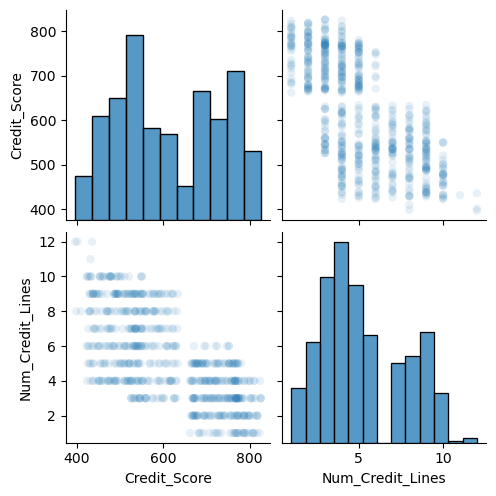

In [15]:
# Creating a scatterplot matrix to visualize the Credit_Risk and Months_In_Job
sns.pairplot(data, vars=['Credit_Score', 'Num_Credit_Lines'], plot_kws=dict(alpha=0.1, edgecolor='none'))

# Display the plot
plt.show()


## Feature Engineering

In [16]:
#Separating Features into Categorical and Numerical Variables
numerical_features = data.select_dtypes(include=['number']).columns
categorical_features = data.columns.difference(numerical_features.tolist())


In [17]:
numerical_features 

Index(['Applicant_ID', 'Credit_Score', 'Late_Payments', 'Months_In_Job',
       'Debt_Income_Ratio', 'Loan_Amt', 'Liquid_Assets', 'Num_Credit_Lines'],
      dtype='object')

In [18]:
categorical_features

Index(['Credit_Risk'], dtype='object')

In [19]:
#creating pandas table with numerical and categorical variables
num_features = data[numerical_features]
cat_features = data[categorical_features]

In [20]:
num_features

,Applicant_ID,Credit_Score,Late_Payments,Months_In_Job,Debt_Income_Ratio,Loan_Amt,Liquid_Assets,Num_Credit_Lines
0,744488,607,5,29,3.414,103519,2696,6
1,350833,533,8,21,3.737,74868,5336,8
2,466037,474,12,25,5.061,93468,1785,4
3,721737,551,13,3,5.926,41708,2104,10
4,455703,768,0,13,1.910,318995,11523,3
...,...,...,...,...,...,...,...,...
671,530309,438,15,5,7.894,101966,945,5
672,510750,511,4,5,8.640,42658,3648,4
673,425474,823,0,76,0.250,302845,24699,1
674,872263,451,15,21,3.362,52330,1223,9


In [21]:
cat_features

,Credit_Risk
0,Moderate
1,Moderate
2,High
3,High
4,Low
...,...
671,High
672,High
673,Very Low
674,High


In [22]:
#encoding the categorical feature
label_encoder = LabelEncoder()
encoded_cat_features = label_encoder.fit_transform(cat_features)

In [23]:
#accessing the original categorical values from the encoded data
original_cat_features = label_encoder.inverse_transform(encoded_cat_features)

In [24]:
#displaying the original categorical values
for encoded_value, original_value in zip(encoded_cat_features, original_cat_features):
    print(f"Encoded number {encoded_value} corresponds to original value: {original_value}")

Encoded number 3 corresponds to original value: Moderate
Encoded number 3 corresponds to original value: Moderate
Encoded number 1 corresponds to original value: High
Encoded number 1 corresponds to original value: High
Encoded number 2 corresponds to original value: Low
Encoded number 1 corresponds to original value: High
Encoded number 2 corresponds to original value: Low
Encoded number 3 corresponds to original value: Moderate
Encoded number 0 corresponds to original value: DO NOT LEND
Encoded number 1 corresponds to original value: High
Encoded number 2 corresponds to original value: Low
Encoded number 1 corresponds to original value: High
Encoded number 3 corresponds to original value: Moderate
Encoded number 1 corresponds to original value: High
Encoded number 2 corresponds to original value: Low
Encoded number 4 corresponds to original value: Very Low
Encoded number 3 corresponds to original value: Moderate
Encoded number 4 corresponds to original value: Very Low
Encoded number 

In [25]:
#convert encoded values back to a pandas DataFrame
new_cat_features = pd.DataFrame(encoded_cat_features, columns=['Encoded_CreditRisk'])
new_cat_features

,Encoded_CreditRisk
0,3
1,3
2,1
3,1
4,2
...,...
671,1
672,1
673,4
674,1


In [26]:
#concatenate the new categorical DataFrame with numerical DataFrame
data_encoded = pd.concat([num_features, new_cat_features], axis=1)

#display the updated DataFrame
data_encoded.head()


,Applicant_ID,Credit_Score,Late_Payments,Months_In_Job,Debt_Income_Ratio,Loan_Amt,Liquid_Assets,Num_Credit_Lines,Encoded_CreditRisk
0,744488,607,5,29,3.414,103519,2696,6,3
1,350833,533,8,21,3.737,74868,5336,8,3
2,466037,474,12,25,5.061,93468,1785,4,1
3,721737,551,13,3,5.926,41708,2104,10,1
4,455703,768,0,13,1.910,318995,11523,3,2


In [27]:
#correlation matrix
corr_matrix = data_encoded.corr()
corr_matrix

,Applicant_ID,Credit_Score,Late_Payments,Months_In_Job,Debt_Income_Ratio,Loan_Amt,Liquid_Assets,Num_Credit_Lines,Encoded_CreditRisk
Applicant_ID,1.000000,-0.017437,0.064464,0.025875,0.031106,-0.075462,0.015357,0.034507,-0.044356
Credit_Score,-0.017437,1.000000,-0.779312,0.618563,-0.791772,0.232425,0.763321,-0.680375,0.581072
Late_Payments,0.064464,-0.779312,1.000000,-0.496020,0.750508,-0.206462,-0.622170,0.577981,-0.575371
Months_In_Job,0.025875,0.618563,-0.496020,1.000000,-0.516425,0.208444,0.530973,-0.450828,0.469244
Debt_Income_Ratio,0.031106,-0.791772,0.750508,-0.516425,1.000000,-0.198540,-0.610265,0.589069,-0.642028
Loan_Amt,-0.075462,0.232425,-0.206462,0.208444,-0.198540,1.000000,0.211812,-0.146497,0.225823
Liquid_Assets,0.015357,0.763321,-0.622170,0.530973,-0.610265,0.211812,1.000000,-0.562877,0.411940
Num_Credit_Lines,0.034507,-0.680375,0.577981,-0.450828,0.589069,-0.146497,-0.562877,1.000000,-0.406961
Encoded_CreditRisk,-0.044356,0.581072,-0.575371,0.469244,-0.642028,0.225823,0.411940,-0.406961,1.000000


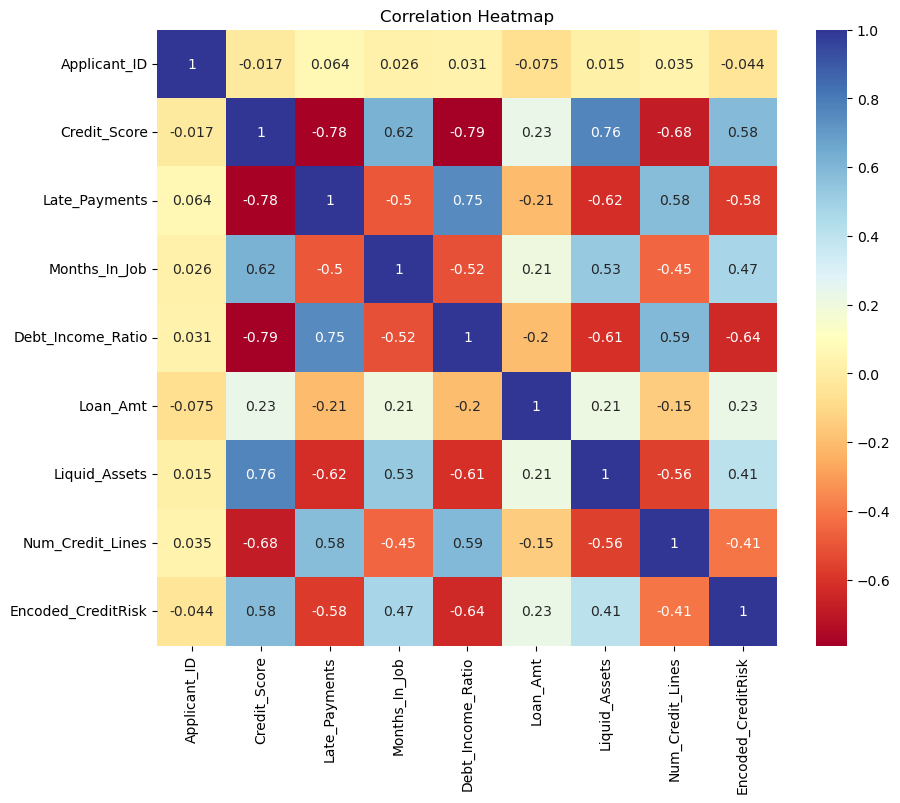

In [28]:
#correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="RdYlBu")
plt.title("Correlation Heatmap")
plt.show()

In [29]:
#dropping application ID, not necessary for the project
data_new = data_encoded.drop('Applicant_ID', axis=1)
data_new.head()

,Credit_Score,Late_Payments,Months_In_Job,Debt_Income_Ratio,Loan_Amt,Liquid_Assets,Num_Credit_Lines,Encoded_CreditRisk
0,607,5,29,3.414,103519,2696,6,3
1,533,8,21,3.737,74868,5336,8,3
2,474,12,25,5.061,93468,1785,4,1
3,551,13,3,5.926,41708,2104,10,1
4,768,0,13,1.910,318995,11523,3,2


**Separating target from input variables and scaling the input variables**

In [30]:
#separating the target variable from the input variable
Y = data_new['Credit_Score']
X = data_new.drop(columns = 'Credit_Score')

In [31]:
#scaling the input variables
from sklearn.preprocessing import StandardScaler

#creating the instance of StandardScaler
ss = StandardScaler()

#scaling the input
X_scaled = ss.fit_transform(X)

#creating a new dataframe with the scaled feature
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

**Feature importance**

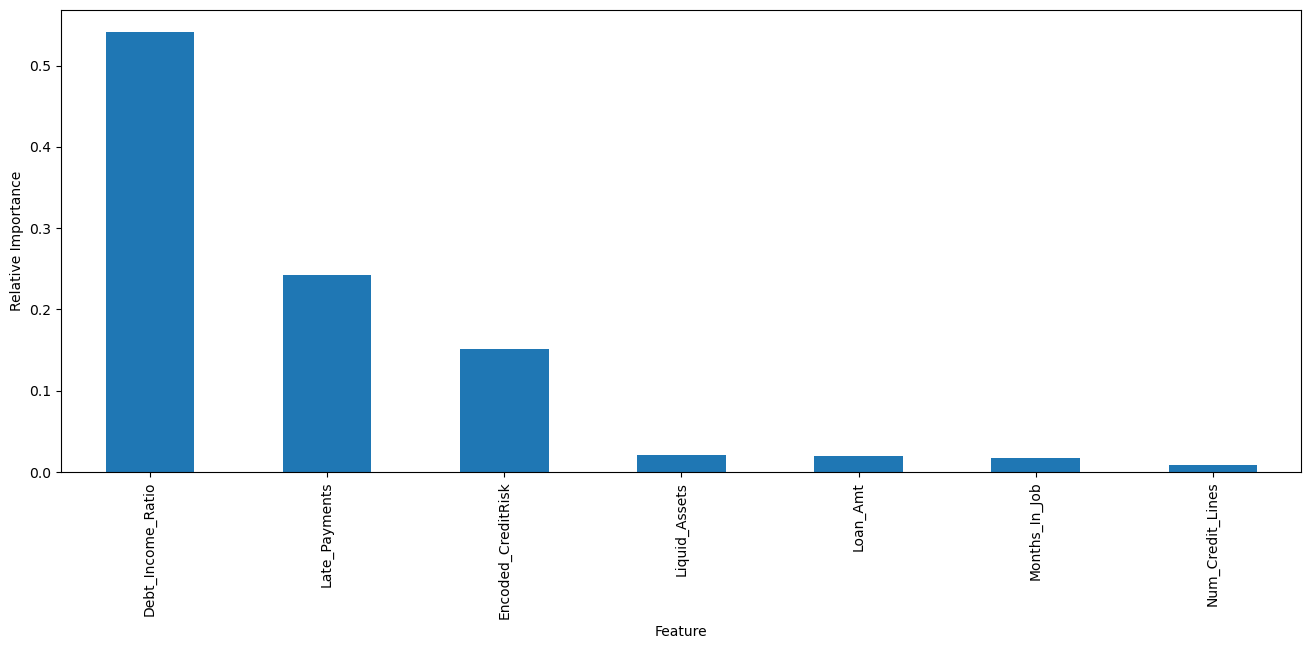

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.1, random_state=42)

# Create a Random Forest regressor
rf = RandomForestRegressor()

# Fit the Random Forest regressor on the training data
rf.fit(x_train, y_train)

# Predict the target variable based on the test data
y_pred = rf.predict(x_test)

# Calculate feature importances
feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Create a bar plot of feature importances
ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set(ylabel='Relative Importance')
ax.set(xlabel='Feature')

# Display the plot
plt.show()

## Model Development

### Random Forest

In [33]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 

In [34]:
rf = RandomForestRegressor()
#Fit the rf based on train data
rf.fit(x_train, y_train)

# Compute training R2
training_R2 = rf.score(x_train, y_train)
training_R2

0.9871170921225757

Text(0.5, 1.0, 'Training R2 = 0.99  Test R2 = 0.92')

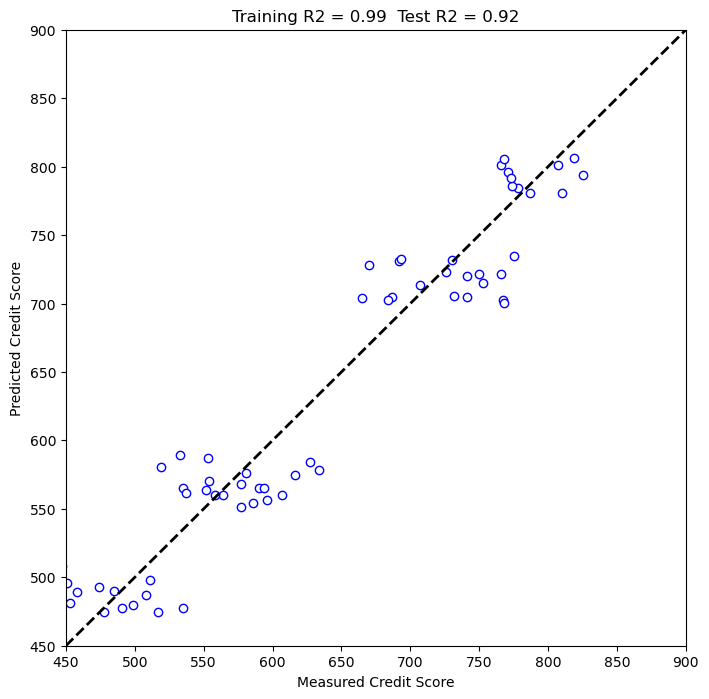

In [35]:
#Predict the target based on test data
y_pred=rf.predict(x_test)

# Compute test R2
test_R2 = rf.score(x_test, y_test)   

# Calculating MSE 
error = mean_squared_error(y_test, y_pred) 
residual = (y_test - y_pred)  
   
# Also create a series of plots for predicted versus actual DT for different values of K
fig = plt.figure(figsize=(8, 8))
plt.axis([450, 900, 450, 900])
plt.scatter(y_test, y_pred, c = 'w', edgecolor = 'b')
plt.plot([450, 900],[450, 900], color='black', linewidth=2, linestyle='--')
plt.ylabel('Predicted Credit Score') 
plt.xlabel('Measured Credit Score') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

### KNN ( K-Nearest Neighbors)

In [36]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor

In [37]:
from sklearn.neighbors import KNeighborsRegressor

#storing the values of k
K = []
#storing R-squared values of different k
r_squared = []

#for loop for each k
for k in range(10, 31, 10):
    # Define knn as KNeighborsRegressor for each k initiated from the for loop
    knn = KNeighborsRegressor(n_neighbors=k)
    # Fit the knn based on train data
    knn.fit(x_train, y_train)
    # Predict the target based on test data
    y_pred = knn.predict(x_test)
    # Calculate and store the value of k
    K.append(k)
    # Calculate R-squared and store the value
    r_squared.append(knn.score(x_test, y_test))
    # Compute test R2
    test_R2 = knn.score(x_test, y_test)   

    # Calculating MSE 
    error = mean_squared_error(y_test, y_pred) 
    residual = (y_test - y_pred) 

Text(0.5, 1.0, 'Training R2 = 0.99  Test R2 = 0.91')

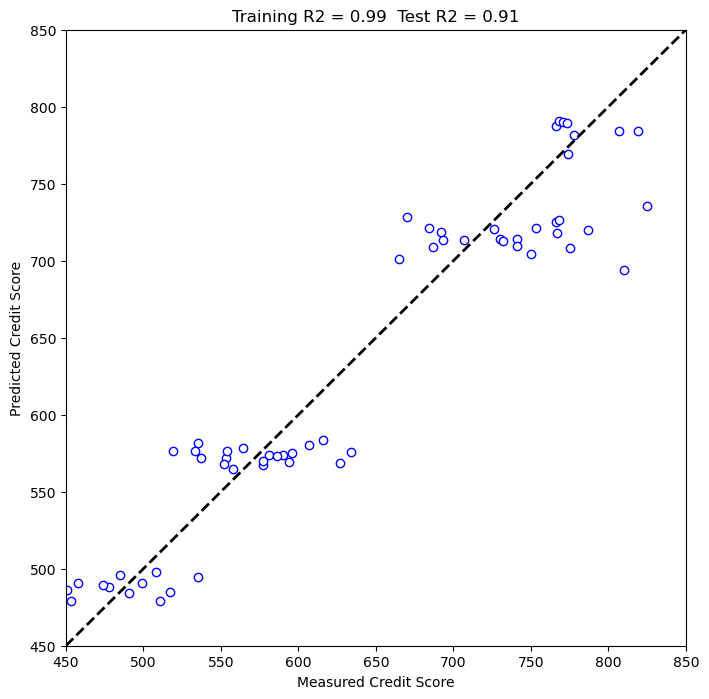

In [38]:
# Also create a series of plots for predicted versus actual DT for different values of K
fig = plt.figure(figsize=(8, 8))
plt.axis([450, 850, 450, 850])
plt.scatter(y_test, y_pred, c = 'w', edgecolor = 'b')
plt.plot([450, 850],[450, 850], color='black', linewidth=2, linestyle='--')
plt.ylabel('Predicted Credit Score') 
plt.xlabel('Measured Credit Score') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

### Decision Tree

In [39]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

# Compute training R2
training_R2 = dt.score(x_train, y_train)
training_R2

1.0

Text(0.5, 1.0, 'Training R2 = 1.00  Test R2 = 0.85')

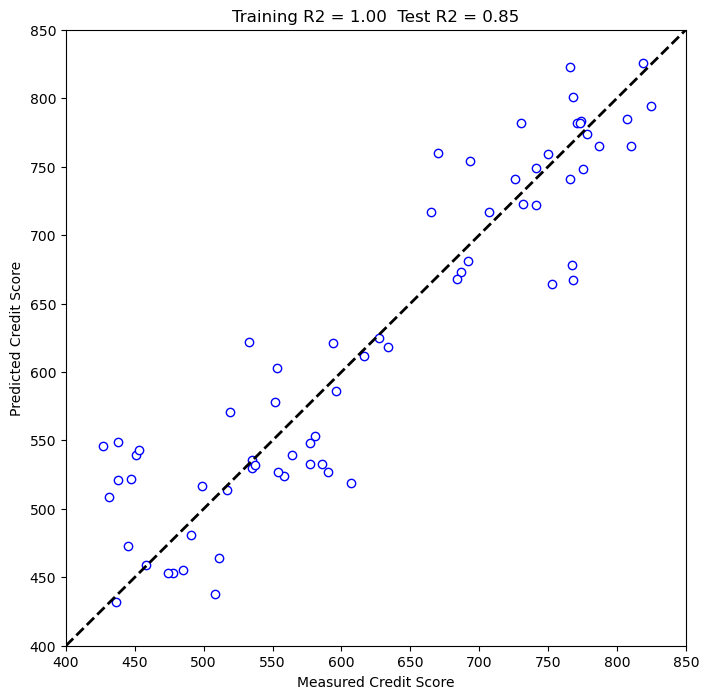

In [40]:
#Predict the target based on test data
y_pred=dt.predict(x_test)

# Compute test R2
test_R2 = dt.score(x_test, y_test)   

# Calculating MSE 
error = mean_squared_error(y_test, y_pred) 
residual = (y_test - y_pred)  
   
# Also create a series of plots for predicted versus actual DT for different values of K
fig = plt.figure(figsize=(8, 8))
plt.axis([400, 850, 400, 850])
plt.scatter(y_test, y_pred, c = 'w', edgecolor = 'b')
plt.plot([400, 850],[400, 850], color='black', linewidth=2, linestyle='--')
plt.ylabel('Predicted Credit Score') 
plt.xlabel('Measured Credit Score') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

### ANN (Artificial Neural Network)

In [41]:
from sklearn.neural_network import MLPRegressor

ann = MLPRegressor()
ann.fit(x_train, y_train)

# Compute training R2
training_R2 = ann.score(x_train, y_train)
training_R2

-10.862956198762456

Text(0.5, 1.0, 'Training R2 = -10.86  Test R2 = -9.16')

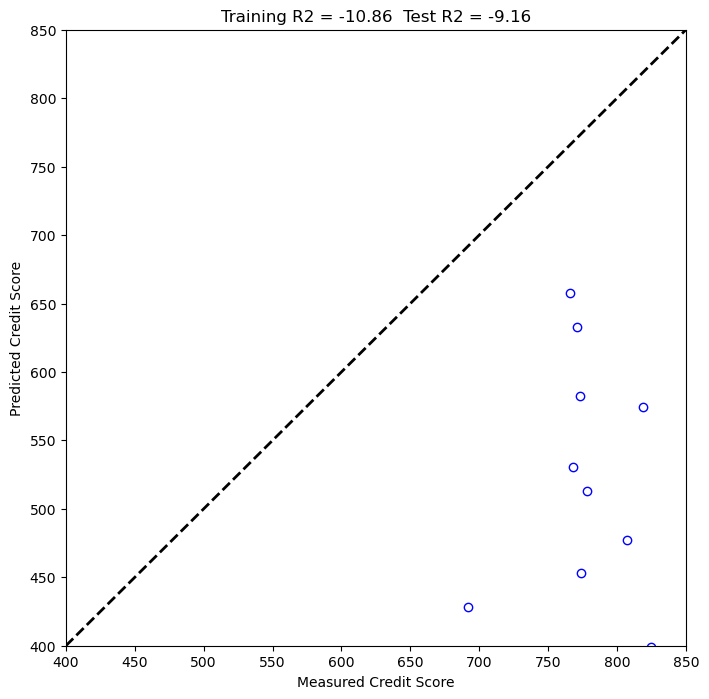

In [42]:
#Predict the target based on test data
y_pred=ann.predict(x_test)

# Compute test R2
test_R2 = ann.score(x_test, y_test)   

# Calculating MSE 
error = mean_squared_error(y_test, y_pred) 
residual = (y_test - y_pred)  
   
# Also create a series of plots for predicted versus actual DT for different values of K
fig = plt.figure(figsize=(8, 8))
plt.axis([400, 850, 400, 850])
plt.scatter(y_test, y_pred, c = 'w', edgecolor = 'b')
plt.plot([400, 850],[400, 850], color='black', linewidth=2, linestyle='--')
plt.ylabel('Predicted Credit Score') 
plt.xlabel('Measured Credit Score') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

### SVM (Support Vector Machine)

In [43]:
from sklearn.svm import SVR

svm = SVR(C=1, kernel='rbf', gamma='scale')
svm.fit(x_train, y_train)

# Compute training R2
training_R2 = svm.score(x_train, y_train)
training_R2

0.600110007331399

Text(0.5, 1.0, 'Training R2 = 0.60  Test R2 = 0.57')

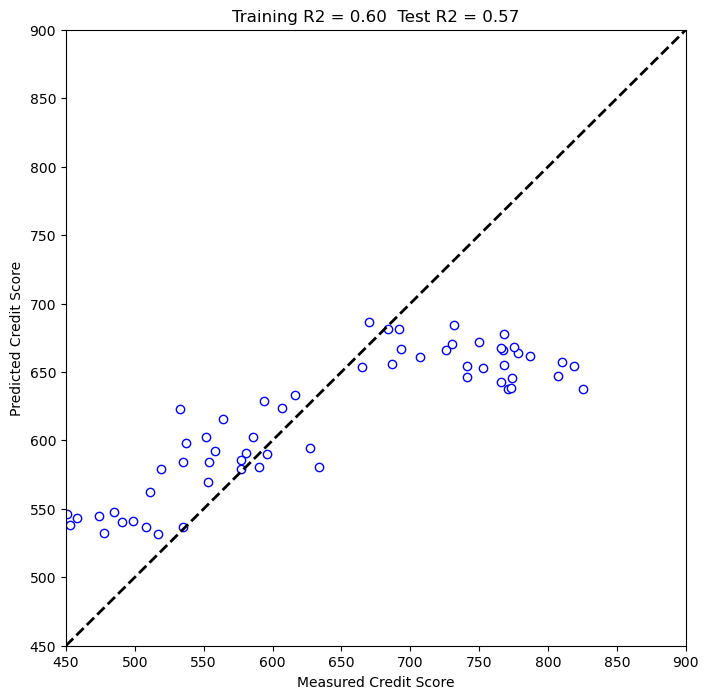

In [44]:
#Predict the target based on test data
y_pred=svm.predict(x_test)

# Compute test R2
test_R2 = svm.score(x_test, y_test)   

# Calculating MSE 
error = mean_squared_error(y_test, y_pred) 
residual = (y_test - y_pred)  
   
# Also create a series of plots for predicted versus actual DT for different values of K
fig = plt.figure(figsize=(8, 8))
plt.axis([450, 900, 450, 900])
plt.scatter(y_test, y_pred, c = 'w', edgecolor = 'b')
plt.plot([450, 900],[450, 900], color='black', linewidth=2, linestyle='--')
plt.ylabel('Predicted Credit Score') 
plt.xlabel('Measured Credit Score') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

## Gradient Boost

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

# Create an instance of the Gradient Boosting Regressor
gbr = GradientBoostingRegressor()

# Fit the model to the training data
gbr.fit(x_train, y_train)

# Compute training R2
training_R2 = gbr.score(x_train, y_train)
training_R2

0.949305043103631

Text(0.5, 1.0, 'Training R2 = 0.95  Test R2 = 0.92')

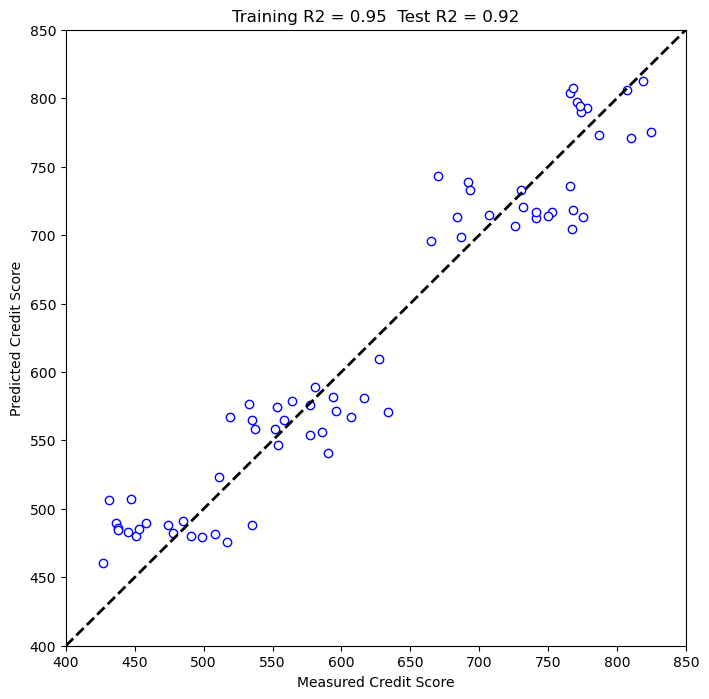

In [47]:
#Predict the target based on test data
y_pred=gbr.predict(x_test)

# Compute test R2
test_R2 = gbr.score(x_test, y_test)   

# Calculating MSE 
error = mean_squared_error(y_test, y_pred) 
residual = (y_test - y_pred)  
 
fig = plt.figure(figsize=(8, 8))
plt.axis([400, 850, 400, 850])
plt.scatter(y_test, y_pred, c = 'w', edgecolor = 'b')
plt.plot([400, 850],[400, 850], color='black', linewidth=2, linestyle='--')
plt.ylabel('Predicted Credit Score') 
plt.xlabel('Measured Credit Score') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))